In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# reshaping
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
# introduce noise to data
noise_factor = 0.5

In [5]:
# loc = center of distribution
# scale = std deviation of distribution
# np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

In [6]:
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [7]:
import matplotlib.pyplot as plt

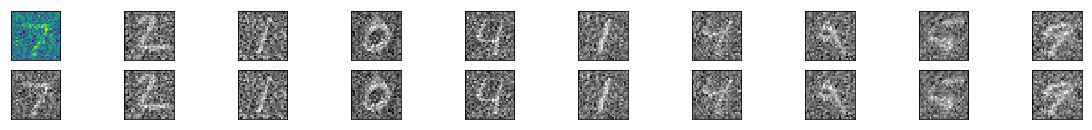

In [8]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [10]:
input_img = Input(shape=(28, 28, 1))

In [11]:
# encoder

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

In [12]:
# decoder

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D(size=(2, 2))(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)

decoded = Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(x)

In [13]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s - loss: 0.1739 - acc: 0.8028 - val_loss: 0.1255 - val_acc: 0.8104
Epoch 2/30
60000/60000 [==============================] - 12s - loss: 0.1193 - acc: 0.8100 - val_loss: 0.1118 - val_acc: 0.8096
Epoch 3/30
60000/60000 [==============================] - 12s - loss: 0.1118 - acc: 0.8113 - val_loss: 0.1088 - val_acc: 0.8119
Epoch 4/30
60000/60000 [==============================] - 12s - loss: 0.1078 - acc: 0.8119 - val_loss: 0.1048 - val_acc: 0.8108
Epoch 5/30
60000/60000 [==============================] - 12s - loss: 0.1052 - acc: 0.8123 - val_loss: 0.1050 - val_acc: 0.8125
Epoch 6/30
60000/60000 [==============================] - 12s - loss: 0.1037 - acc: 0.8125 - val_loss: 0.1035 - val_acc: 0.8125
Epoch 7/30
60000/60000 [==============================] - 12s - loss: 0.1027 - acc: 0.8127 - val_loss: 0.1010 - val_acc: 0.8114
Epoch 8/30
60000/60000 [==============================

In [16]:
decoded_images = autoencoder.predict(x_test_noisy)

In [17]:
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(x_test_noisy)

In [19]:
encoded.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

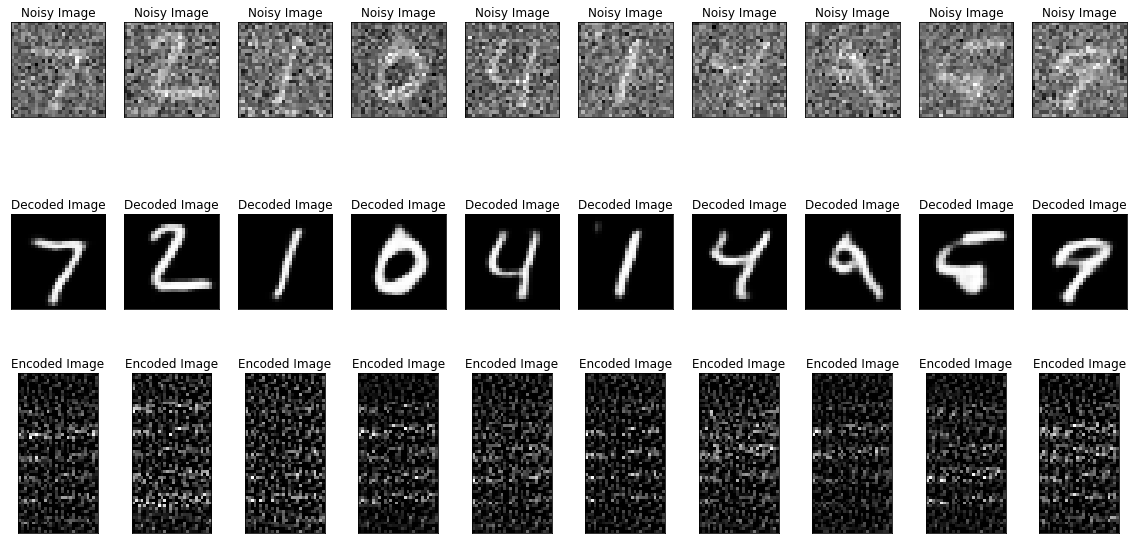

In [25]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy Image')

    # display decoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Decoded Image')
    
    # display encoded images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(encoded_images[i].reshape(8*7, 4*7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Encoded Image')
plt.show()